# INFO 6205 – Program Structure and Algorithms Worked Assignment 3

Student Name:**Xiaoyang Chen**               
Professor: **Nik Bear Brown**

## Question 1        
Provide concise definitions and name a common application or use-case for each of the following:
1. Ford-Fulkerson Algorithm
2. Bellman-Ford Algorithm
3. Kruskal's Algorithm
4. Knapsack Problem
5. Residual Graph
6. Bipartite Matching

## Solutions:    
1. Ford-Fulkerson Algorithm: An algorithm used to solve the maximum flow problem in a flow network. It finds the maximum flow from a source node to a sink node.The algorithm starts with an initial flow and iteratively augments it until a maximum flow is reached. The core concept is to find augmenting paths in the residual graph and update the flow accordingly.
Common Application: Network bandwidth optimization, supply chain management.


2. Bellman-Ford Algorithm: An algorithm that finds the shortest path from a single source vertex to all other vertices in a weighted graph, handling graphs with negative weight edges.
Common Application: Routing protocols in networking, such as OSPF.
                                    

3. Kruskal's Algorithm: An algorithm for finding a minimum spanning tree in an undirected, weighted graph.
Common Application: Network design, like creating a minimal cost network between different nodes.
                                   

4. Knapsack Problem: An optimization problem where the objective is to maximize the total value of items included in a knapsack, subject to a weight constraint.
Common Application: Resource allocation in various domains like finance, healthcare, and manufacturing.
                                   

5. Residual Graph: A graph which is derived from an original flow network and its current flow, showing remaining capacities for each edge.
Common Application: Used in network flow algorithms like Ford-Fulkerson to update capacities.
                                   

6. Bipartite Matching: A set of edges chosen in such a way that no two edges share an endpoint, in a bipartite graph.
Common Application: Job allocation, marriage problem, assigning tasks to workers.

## Question 2        
Given the weighted directed graph below, use the Bellman-Ford algorithm to find the shortest path from node 0 to node 2.

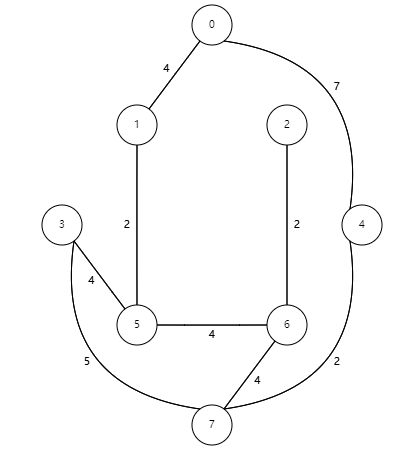
Express it as:      
A. An adjacency list (2.5 points)           
B. An adjacency matrix (2.5 points)            

A.An adjacency list :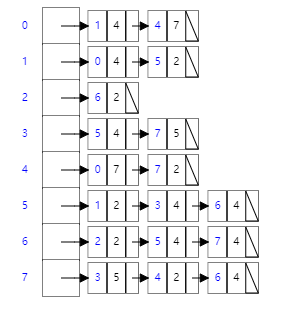

B. An adjacency matrix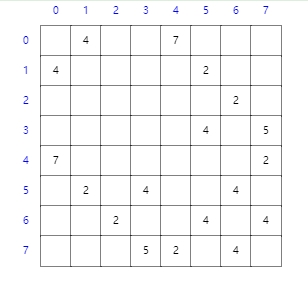

Initialize the distance from node 0 to itself as 0 and to all other nodes as infinity.

| Node   | Distance from 0 |
| ------ | -------------- |
| 0      | 0              |
| 1      | ∞              |
| 2      | ∞              |
| 3      | ∞              |
| 4      | ∞              |
| 5      | ∞              |
| 6      | ∞              |
| 7      | ∞              |


### Iterations
Iteration 1           
Update distance to node 1 through 0: 0 + 4 = 4          
Update distance to node 4 through 0: 0 + 2 = 2      

Iteration 2     
Update distance to node 5 through 1: 4 + 2 = 6      
Update distance to node 3 through 4: 2 + 4 = 6         

Iteration 3        
Update distance to node 6 through 5: 6 + 4 = 10          
Update distance to node 2 through 6: 10 + 2 = 12         

Iteration 4         
Update distance to node 7 through 2: 12 + 4 = 16         

| Node   | Distance from 0 |
| ------ | -------------- |
| 0      | 0              |
| 1      | 4              |
| 2      | 12             |
| 3      | 6              |
| 4      | 2              |
| 5      | 6              |
| 6      | 10             |
| 7      | 16             |


###  Pseudo-Code:

function BellmanFord(Graph, source):          
    distance = [∞ for _ in Graph.V]        
    distance[source] = 0           
    
    for i from 1 to len(Graph.V) - 1:
        for each edge (u, v, w) in Graph.E:
            if distance[u] + w < distance[v]:
                distance[v] = distance[u] + w
    
    for each edge (u, v, w) in Graph.E:
        if distance[u] + w < distance[v]:
            print("Graph contains a negative weight cycle")
    
    return distance


### Python Code  

In [3]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.edges = []

    def add_edge(self, u, v, w):
        self.edges.append((u, v, w))

    def bellman_ford(self, source):
        distance = [float("inf")] * self.V
        distance[source] = 0

        for _ in range(self.V - 1):
            for u, v, w in self.edges:
                if distance[u] != float("inf") and distance[u] + w < distance[v]:
                    distance[v] = distance[u] + w

        for u, v, w in self.edges:
            if distance[u] != float("inf") and distance[u] + w < distance[v]:
                raise Exception("Graph contains a negative weight cycle")

        return distance

g = Graph(8)
g.add_edge(0, 1, 4)
g.add_edge(1, 5, 2)
g.add_edge(5, 6, 4)
g.add_edge(6, 2, 2)
g.add_edge(2, 7, 4)
g.add_edge(7, 3, 5)
g.add_edge(3, 4, 4)
g.add_edge(4, 0, 2)

distances = g.bellman_ford(0)
print(distances)


[0, 4, 12, 21, 25, 6, 10, 16]


## **Question3:**

Use the Ford-Fulkerson algorithm to find the maximum flow from node S to T in the following weighted directed graph:

Nodes: $S, V1, V2, V3, V4, T$

Edges and Capacities:

$S -> V1: 4$

$S -> V2: 2$

$V1 -> V2: 1$

$V1 -> V3: 2$

$V1 -> V4: 4$

$V2 -> V4: 2$

$V3 -> T: 3$

$V4 -> T: 3$
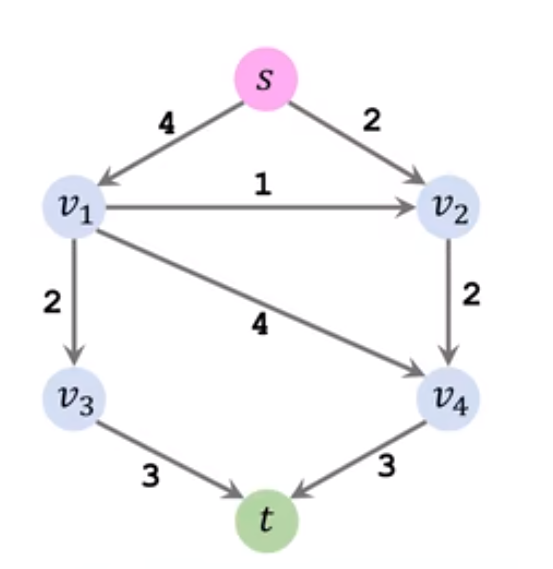

### Solution:
Ford-Fulkerson Algorithm:
Start with an initial flow of 0.      
While there exists an augmenting path in the residual graph, do:        
Find the bottleneck capacity (smallest capacity on the path).        
Add the bottleneck capacity to the flow on each edge in the path.         
Update the residual capacities in the residual graph.           
Return the total flow.        

### Initialization:
Initial Flow:

In [ ]:
S->V1: 0/4    
S->V2: 0/2    
V1->V2: 0/1   
V1->V3: 0/2   
V1->V4: 0/4   
V2->V4: 0/2
V3->T: 0/3
V4->T: 0/3

Iteration 1:            
Augmenting Path: S -> V1 -> V4 -> T

Bottleneck Capacity: 3 (Because of V4->T)

Update Flows:

In [ ]:
S->V1: 3/4
S->V2: 0/2
V1->V2: 0/1
V1->V3: 0/2
V1->V4: 3/4
V2->V4: 0/2
V3->T: 0/3
V4->T: 3/3

Iteration 2:            
Augmenting Path: S -> V2 -> V4 -> T

Bottleneck Capacity: 2 (Because of S->V2)

Update Flows:

In [ ]:
S->V1: 3/4
S->V2: 2/2
V1->V2: 0/1
V1->V3: 0/2
V1->V4: 3/4
V2->V4: 2/2
V3->T: 0/3
V4->T: 3/3

Iteration 3:       
Augmenting Path: S -> V1 -> V3 -> T

Bottleneck Capacity: 1 (Because of V1->V3)

Update Flows:

In [ ]:
S->V1: 4/4
S->V2: 2/2
V1->V2: 0/1
V1->V3: 1/2
V1->V4: 3/4
V2->V4: 2/2
V3->T: 1/3
V4->T: 3/3

No more augmenting paths are available. So, the total max flow = 3 (from V4 to T) + 2 (from S to V2 to V4 to T) + 1 (from V3 to T) = 5.

Thus, the maximum flow from node S to T is 5.

Note: This is a simplified version of the Ford-Fulkerson algorithm. In real applications, care must be taken to handle cases where the algorithm might not terminate.

Here's a runnable Python implementation of the Ford-Fulkerson algorithm applied to the graph in the question:

In [7]:
class Graph:
    def __init__(self, vertex):
        self.V = vertex
        self.adj = [[0 for _ in range(vertex)] for _ in range(vertex)]

    def add_edge(self, u, v, w):
        self.adj[u][v] = w

    def searching_algo_BFS(self, s, t, parent):
        visited = [False] * self.V
        queue = []

        queue.append(s)
        visited[s] = True

        while queue:
            u = queue.pop(0)

            for ind, val in enumerate(self.adj[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    def ford_fulkerson(self, source, sink):
        parent = [-1] * self.V
        max_flow = 0

        while self.searching_algo_BFS(source, sink, parent):
            path_flow = float("inf")
            s = sink

            while s != source:
                path_flow = min(path_flow, self.adj[parent[s]][s])
                s = parent[s]

            max_flow += path_flow

            v = sink
            while v != source:
                u = parent[v]
                self.adj[u][v] -= path_flow
                self.adj[v][u] += path_flow
                v = parent[v]

        return max_flow


# Nodes are represented as: S=0, V1=1, V2=2, V3=3, V4=4, T=5
g = Graph(6)
g.add_edge(0, 1, 4)
g.add_edge(0, 2, 2)
g.add_edge(1, 2, 1)
g.add_edge(1, 3, 2)
g.add_edge(1, 4, 4)
g.add_edge(2, 4, 2)
g.add_edge(3, 5, 3)
g.add_edge(4, 5, 3)

source = 0  # S
sink = 5    # T
print(f"The maximum possible flow is {g.ford_fulkerson(source, sink)}")


The maximum possible flow is 5


### Question4             
Use the Preflow-Push (Push–relabel) maximum flow algorithm to find the maximum flow from node X to Z in the weighted directed graph below. Show your work.

𝑋−>𝑌:4
 
𝑋−>𝑊:6
 
𝑌−>𝑊:2
 
𝑌−>𝑍:3
 
𝑊−>𝑍:5     

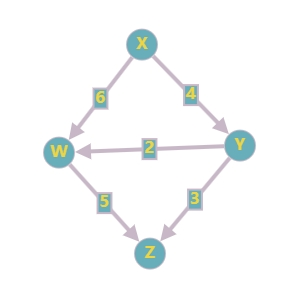

Initial Setup:
Let's initialize the preflow, which is the initial distribution of flow (even if it doesn't satisfy the flow conservation constraints at intermediate nodes).

Given:

h is the height function.       
e is the excess flow at a node.      
f is the flow function between nodes.         
c is the capacity function between nodes.    

Initialize: 

h(X)= number of nodes = 4.            
h(other nodes)=0.                              
Preflow from X to all neighbors, and the excess at those neighbors is equal to this preflow.        

Initial state:      

| Node | h (Height) | e (Excess Flow) |
|------|------------|-----------------|
| X    | 4          | 0               |
| Y    | 0          | 4               |
| W    | 0          | 6               |
| Z    | 0          | 0               |


Flow f:

| From/To | Y | W | Z |
|---------|---|---|---|
| X       | 4 | 6 | 0 |
| Y       | 0 | 0 | 0 |
| W       | 0 | 0 | 0 |


Push and Relabel Operations:         
### Iteration 1:                 
Push from $X$ to $Y$ and $X$ to $W$.                 
$Y$ now has an excess of 4.
$W$  now has an excess of 6.              
Push from $Y$ to $W$ and $Y$ to $Z$. However, $Y$ to $W$ is limited by capacity, so it can only push 2 units.
  
### Iteration 2: 

$Y$ pushes 2 to $W$ and pushes 2 to $Z$.

Updated excess flows:

| Node | e   |
|------|-----|
| X    | 0   |
| Y    | 0   |
| W    | 8   |
| Z    | 2   |


Relabel W since we cannot push the entire excess to Z directly due to capacity constraint.

### Iteration 3:                 
Increase height of W and push from W to Z with a flow of 5 (limited by capacity).

Updated excess flows:

| Node | e |
|------|---|
| X    | 0 |
| Y    | 0 |
| W    | 3 |
| Z    | 7 |


### Iteration 4:        
We can't push any more flows, and the network reaches equilibrium.

Conclusion:
The maximum flow from 
X to Z in the given network is 7.

The Push-Relabel algorithm can be described in pseudo-code. Here's a simplified version tailored for the provided graph:

####  Pseudo-Code:

In [ ]:
# This is pseudo-code for better explaining solution process

function PushRelabel(graph, source, sink):
    Initialize height, flow and excess for each node

    height[source] = number of nodes in graph
    for each edge (source, v):
        flow[source][v] = capacity[source][v]
        excess[v] = capacity[source][v]

    while there exists a node u with excess[u] > 0 and u != source and u != sink:
        if there's an adjacent node v where height[u] > height[v] and (u->v has remaining capacity or v->u has flow):
            PUSH(u, v)
        else:
            RELABEL(u)
    return flow

function PUSH(u, v):
    delta = min(excess[u], capacity[u][v] - flow[u][v])
    flow[u][v] += delta
    flow[v][u] -= delta
    excess[u] -= delta
    excess[v] += delta

function RELABEL(u):
    minHeight = +infinity
    for each edge (u, v) with positive capacity:
        minHeight = min(minHeight, height[v])
    height[u] = minHeight + 1

This is a Python implementation of the Push-Relabel algorithm to compute the maximum flow for given graph.

In [ ]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.adj = [[0 for _ in range(vertices)] for _ in range(vertices)]
        self.flow = [[0 for _ in range(vertices)] for _ in range(vertices)]
        self.height = [0 for _ in range(vertices)]
        self.excess_flow = [0 for _ in range(vertices)]

    def add_edge(self, s, t, w):
        self.adj[s][t] = w

    def push(self, u, v):
        push_flow = min(self.excess_flow[u], self.adj[u][v] - self.flow[u][v])
        self.excess_flow[u] -= push_flow
        self.excess_flow[v] += push_flow
        self.flow[u][v] += push_flow
        self.flow[v][u] -= push_flow

    def relabel(self, u):
        min_height = float('inf')
        for v in range(self.V):
            if self.adj[u][v] - self.flow[u][v] > 0:
                min_height = min(min_height, self.height[v])
                self.height[u] = min_height + 1

    def preflow(self, source):
        self.height[source] = self.V
        for v in range(self.V):
            self.flow[source][v] = self.adj[source][v]
            self.excess_flow[v] += self.flow[source][v]
            self.flow[v][source] -= self.flow[source][v]
            self.excess_flow[source] -= self.flow[source][v]

    def overflowing_vertex(self, source, sink):
        for i in range(self.V):
            if i != source and i != sink and self.excess_flow[i] > 0:
                return i
        return -1

    def max_flow(self, source, sink):
        self.preflow(source)
        while True:
            u = self.overflowing_vertex(source, sink)
            if u == -1:
                break
            has_admissible_edge = False
            for v in range(self.V):
                if self.adj[u][v] - self.flow[u][v] > 0 and self.height[u] > self.height[v]:
                    self.push(u, v)
                    has_admissible_edge = True
                    break
            if not has_admissible_edge:
                self.relabel(u)
        return self.excess_flow[sink]


if __name__ == "__main__":
    g = Graph(4)
    s, t = 0, 3  # Source and sink
    g.add_edge(s, 1, 4)
    g.add_edge(s, 2, 6)
    g.add_edge(1, 2, 2)
    g.add_edge(1, t, 3)
    g.add_edge(2, t, 5)

    print(f"Max flow from {s} to {t} is: {g.max_flow(s, t)}")


The provided Python code is an implementation of the Preflow-Push (Push-relabel) maximum flow algorithm.
The main block of the code initializes the graph, adds edges with their capacities, and then computes the maximum flow from the source to the sink using the Preflow-Push algorithm.

## Question5

For each of the following recurrences, give an expression for the runtime T(n) if the recurrence can be solved with the Master Theorem. Otherwise, indicate that the Master Theorem does not apply.

**i.** T(n) = 2T(n/4) + √n

**ii.** T(n) = 4T(n/2) + n² log n

**iii.** T(n) = 7T(n/3) + n log n

**iv.** T(n) = T(n/2) + n¹.⁵

**v.** T(n) = 3T(n/3) + n log²n



### Solutions for Generated Question:

**i. T(n) = 2T(n/4) + sqrt(n)**

Using Master Theorem:

a = 2, b = 4, f(n) = sqrt(n)

log_b(a) = log_4(2) = 0.5

As f(n) = O(n^k) where k = 0.5 and k < log_b(a), this falls under Case 2 with k = 0.

Solution: T(n) = Theta(sqrt(n) log n).

**ii. T(n) = 4T(n/2) + n^2 log n**

Using Master Theorem:

a = 4, b = 2, f(n) = n^2 log n

log_b(a) = log_2(4) = 2

This doesn't fit any of the Master Theorem cases.

Solution: Master Theorem does not apply.

**iii. T(n) = 7T(n/3) + n log n**

Using Master Theorem:

a = 7, b = 3, f(n) = n log n

log_b(a) = log_3(7)

This falls under Case 2 with k = 1.

Solution: T(n) = Theta(n^(log3 7) log^2 n).

**iv. T(n) = T(n/2) + n^1.5**

Using Master Theorem:

a = 1, b = 2, f(n) = n^1.5

log_b(a) = log_2(1) = 0

As f(n) is Omega(n^e) where e = 1.5 > log_b(a), this falls under Case 3.

Solution: T(n) = Theta(n^1.5).

**v. T(n) = 3T(n/3) + n log^2 n**

Using Master Theorem:

a = 3, b = 3, f(n) = n log^2 n

log_b(a) = log_3(3) = 1

This falls under Case 2 with k = 2.

Solution: T(n) = Theta(n log^3 n).



## Question6

### Problem Statement:

You are managing a conference center. There are multiple conference rooms available, but due to limited technical resources (e.g., AV equipment, tech support), not all rooms can be occupied at the same time. Each conference has a setup time, teardown time, duration, and a fee associated with it. Your goal is to schedule a set of conferences in such a way that there are no technical resource conflicts and the total fee collected is maximized.

Given a list of conferences with their setup times, teardown times, durations, and fees, determine the maximum fee you can collect and the list of conferences that should be scheduled.

### Input:

A list of conferences where each conference is represented as a tuple (setup_time, teardown_time, duration, fee).
setup_time: an integer (1 <= setup_time <= 100) - the time it takes to prepare the room for the conference.
teardown_time: an integer (1 <= teardown_time <= 100) - the time it takes to clear the room after the conference.
duration: an integer (1 <= duration <= 300) - the length of the conference.
fee: an integer (1 <= fee <= 1000) - the fee collected for holding the conference.
### Output:

Maximum fee that can be collected.
List of conferences (as indices from the input list) that should be scheduled to achieve the maximum fee.

### Solution:
### Python Code:

In [11]:
def conference_schedule(conferences):
    # Sort conferences based on end time (setup_time + duration + teardown_time)
    sorted_conferences = sorted(enumerate(conferences), key=lambda x: x[1][0] + x[1][2] + x[1][3])

    n = len(conferences)
    dp = [0] * (n + 1)
    prev = [-1] * n

    # Helper function to find non-conflicting conference
    def last_non_conflicting(i):
        for j in range(i - 1, -1, -1):
            if sorted_conferences[j][1][0] + sorted_conferences[j][1][2] + sorted_conferences[j][1][3] <= sorted_conferences[i][1][0]:
                return j
        return -1

    for i in range(n):
        include_fee = sorted_conferences[i][1][3]
        l = last_non_conflicting(i)
        if l != -1:
            include_fee += dp[l + 1]

        dp[i + 1] = max(include_fee, dp[i])
        if include_fee > dp[i]:
            prev[i] = l

    # Retrieve selected conferences
    result = []
    i = n - 1
    while i >= 0:
        if prev[i] != -1 or (prev[i] == -1 and dp[i + 1] != dp[i]):
            result.append(sorted_conferences[i][0])
            i = prev[i]
        else:
            i -= 1

    return dp[-1], sorted(result)

# Example:
conferences = [(5, 3, 20, 100), (10, 5, 50, 200), (40, 5, 30, 150)]
print(conference_schedule(conferences))


(200, [1])


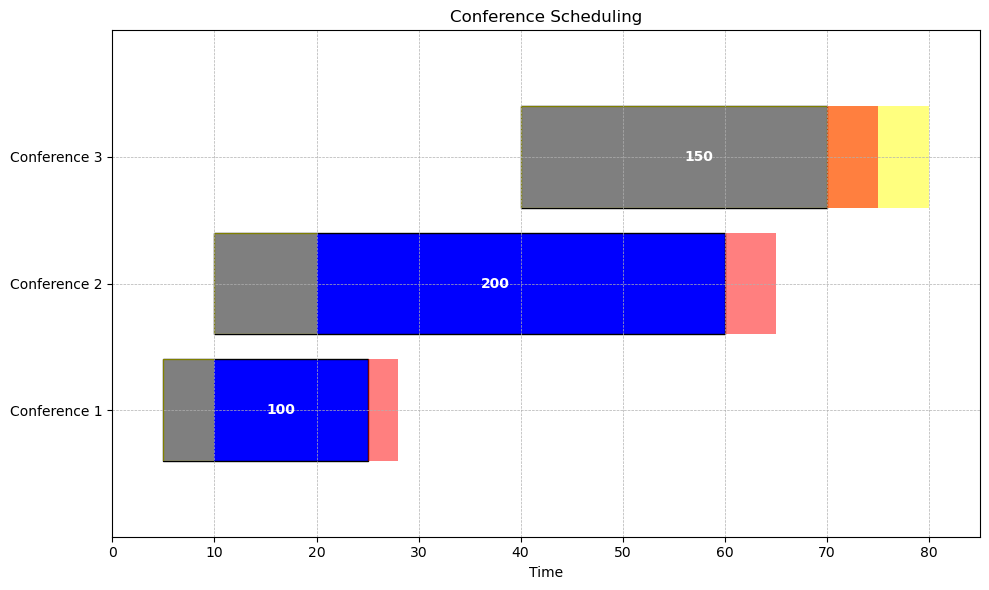

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_conferences(conferences, selected=[]):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Display all intervals (considering setup and teardown times)
    for idx, (setup, teardown, duration, fee) in enumerate(conferences, 1):
        start = setup
        end = setup + duration + teardown
        color = 'green' if (setup, teardown, duration, fee) in selected else 'blue'
        ax.add_patch(patches.Rectangle((start, idx - 0.4), duration, 0.8, facecolor=color, edgecolor='black'))
        
        # Displaying the setup and teardown times as shaded regions
        ax.add_patch(patches.Rectangle((start, idx - 0.4), setup, 0.8, facecolor='yellow', alpha=0.5))
        ax.add_patch(patches.Rectangle((end - teardown, idx - 0.4), teardown, 0.8, facecolor='red', alpha=0.5))
        
        ax.text((start + end) / 2, idx, str(fee), ha='center', va='center', color='white', weight='bold')

    ax.set_yticks(range(1, len(conferences) + 1))
    ax.set_yticklabels([f"Conference {i+1}" for i in range(len(conferences))])
    ax.set_xlabel("Time")
    ax.set_title("Conference Scheduling")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_xlim(0, max([setup + duration + teardown for setup, teardown, duration, fee in conferences]) + 10) # Adjust xlim for better visualization
    ax.set_ylim(0, len(conferences) + 1)
    plt.tight_layout()
    plt.show()

# Example usage:
conferences = [(5, 3, 20, 100), (10, 5, 50, 200), (40, 5, 30, 150)]
_, selected_conferences = conference_schedule(conferences)
visualize_conferences(conferences, selected_conferences)


## Question7          
Given the volumes and prices of the six items listed in the table below, select a subset of items with the maximum combined price that can be stored in a container with a volume limit, `V`, of 12. Use dynamic programming to find the solution. Provide a detailed explanation of your approach.

| Item | Volume | Price |
|------|--------|-------|
| A    | 2      | 5     |
| B    | 3      | 8     |
| C    | 4      | 6     |
| D    | 5      | 7     |
| E    | 6      | 9     |
| F    | 7      | 10    |

**Solution:** 

**Algorithm:** Let's define two arrays based on the given data:
- `volume = [2, 3, 4, 5, 6, 7]` representing the volume of each item.
- `price = [5, 8, 6, 7, 9, 10]` representing the price of each item.

The dynamic programming formula can be defined as:

In [ ]:
for i ← 1 to n:
    for x ← 1 to V:
        if volume[i] > x:
            OPT[i, x] ← OPT[i - 1, x]
        else:
            OPT[i, x] ← max(OPT[i - 1, x], OPT[i - 1, x - volume[i]] + price[i])

| OPT\[i, x\] | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|------------|---|---|---|---|---|---|---|---|---|---|----|----|----|
| 0          | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0  | 0  | 0  |
| A          | 0 | 0 | 5 | 5 | 5 | 5 | 5 | 5 | 5 | 5 | 5  | 5  | 5  |
| B          | 0 | 0 | 5 | 8 | 8 | 13| 13| 13| 13| 13| 13 | 13 | 13 |
| C          | 0 | 0 | 5 | 8 | 8 | 13| 13| 14| 14| 19| 19 | 19 | 19 |
| D          | 0 | 0 | 5 | 8 | 8 | 13| 13| 14| 15| 20| 20 | 21 | 22 |
| E          | 0 | 0 | 5 | 8 | 8 | 13| 13| 14| 15| 20| 20 | 21 | 22 |
| F          | 0 | 0 | 5 | 8 | 8 | 13| 13| 14| 15| 20| 20 | 21 | 22 |


The maximum combined price that can be stored in the container with a volume limit V of 12 is 22.

## Question8
Consider a transportation network with unit cost edges. That is a directed graph H = (P, Q) with a starting point `p ∈ P`, and destination point `d ∈ P`. Every edge `q ∈ Q` has a toll `tq = 2`.

Given an integer parameter `l <= |Q|`, your objective is to increase the transportation cost from `p` to `d` by adding tolls to `l` edges. In other words, you need to select a subset of edges N from Q with cardinality `l` (i.e. `|N| = l` and N is a subset of Q) such that the transportation cost from `p-d` in H’ = (P, Q + N) is as high as possible.

## Solution:
If the shortest `p-d` path has length ≤ `l`, then we can increase the cost to a maximum. Otherwise, let g > `l` be the cost of the shortest `p-d` path. We determine the shortest `p-d` path (X, Y), and add tolls to `l` of the edges in X. The resulting graph has a minimum transportation cost of at least g + 2l.

However, we assert that for any set of edges R of size `l`, the graph H’ = (P, Q + R) has a `p-d` transportation cost of at most g + 2l. Indeed, consider any path (X, Y) of H’. There are at least g edges in X in H, and at most `l` have been tolled, so there are at most g + 2l edges in X in H’. Therefore, the shortest path in H’ has a cost of at most g + 2l, ensuring that there is a path of this maximum cost.
